# Multiple Linear Regression
## Boombikes Case Study

#### Problem Statement:

Boombikes is a bike sharing rental company that has a dataset for two years containing the data from various meteorological surveys and people's styles for renting bikes in US region.
BoomBikes aspires to understand the factors on which the demand for these shared bikes depends  among the people. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

The steps we will follow in this exercise will be as follows

1. Reading and understanding the data
2. Preparing the data for modelling( handling the categorical variables and rescalling)
3. Visualising the Data
4. Data Preparation 
5. Model Building and Evaluation
6. Residual Analysis of the train data
7. Making Predictions Using the Final Model
8. Model Evaluation

## Step 1. Reading and understanding the data

Let us first import NumPy and Pandas and read and understand the housing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
bikes = pd.read_csv('BoomBikes_day.csv')

In [3]:
bikes.shape

(730, 16)

In [4]:
#Checking the data for any nulls. Fortunately there are no null values in our dataset.
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2. Preparing the data for modelling( handling the categorical variables and rescalling)
As understood from the data dictionary, many nominal categorical variables are represented using numbers like seasons have values 1,2,3,4. This kind of representation will make algorithm to misinterpret the data. <br>
Hence 
1. We will replace the these numbers with those values.
2. Represent such categorical values using dummy columns. 

In [6]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.
print(bikes['season'].value_counts())
bikes['season'] = bikes['season'].apply(lambda x: 'spring' if x==1 else('summer' if x==2 else('fall' if x==3 else 'winter') ))
print(bikes['season'].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [7]:
# year (0:2018 , 1:2019)
bikes['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [8]:
#we will update the month values with month abbrevations.
# we will create a function for this
#check the date before conversion
print(bikes['mnth'].astype('category').value_counts())

# Applying the function to the two columns
bikes[['mnth']] = bikes[['mnth']].apply(lambda x: x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}))

#check the date after conversion
print(bikes['mnth'].astype('category').value_counts())

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64


In [9]:
# checking the value counts for holiday column (0: No, 1: Yes)
bikes['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [10]:
# We will assign day name for weekday column instead of numeric value.
# we will check the counts before conversion
bikes['weekday'].astype('category').value_counts()

#Apply lambda function
bikes[['weekday']] = bikes[['weekday']].apply(lambda x: x.map({1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'}))


In [11]:
# we will check the counts after conversion
bikes['weekday'].astype('category').value_counts()

Mon     105
Tue     105
Wed     105
Sat     104
Sun     104
Thur    104
Fri     103
Name: weekday, dtype: int64

In [12]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
bikes['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [13]:
# We will give string values to weathersit values as below.
#1: ClearSky, 2:Misty, 3:LightRain, 4:Rainy

# we will check the counts before conversion
bikes['weathersit'].astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
#Apply lambda function
bikes[['weathersit']] = bikes[['weathersit']].apply(lambda x: x.map({1: 'ClearSky', 2: 'Misty', 3: 'LightRain', 4: 'Rainy'}))

# we will check the counts after conversion
bikes['weathersit'].astype('category').value_counts()

ClearSky     463
Misty        246
LightRain     21
Name: weathersit, dtype: int64

In [15]:
# Converting date to datetime format
#format before conversion
print(bikes['dteday'].dtypes)
bikes['dteday']=bikes['dteday'].astype('datetime64')


object


C:\Users\siz71\AppData\Local\Temp\ipykernel_19216\314675351.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bikes['dteday']=bikes['dteday'].astype('datetime64')


In [16]:
#format after conversion
print(bikes['dteday'].dtypes)

datetime64[ns]


In [17]:
#let's look at the data after conversions
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,ClearSky,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thur,1,ClearSky,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,ClearSky,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 3. Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Lets observe the distribution of the various features using density plots for continous variables

C:\Users\siz71\AppData\Local\Temp\ipykernel_19216\3374449943.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikes['temp'],bins=20,color='g').set(title='Temperature in Celsius')


[Text(0.5, 1.0, 'Temperature in Celsius')]

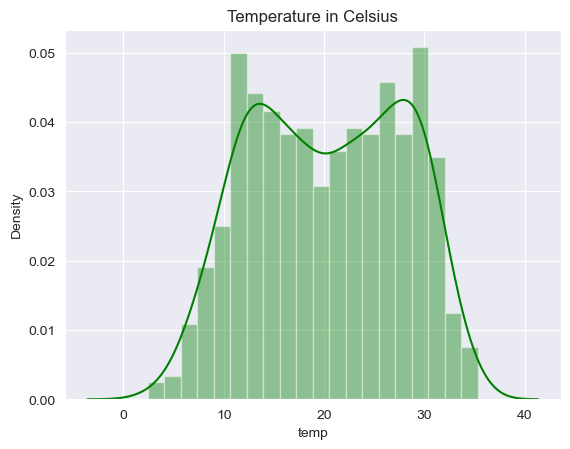

In [18]:
sns.set_style("darkgrid")
sns.distplot(bikes['temp'],bins=20,color='g').set(title='Temperature in Celsius')

C:\Users\siz71\AppData\Local\Temp\ipykernel_19216\2917498605.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikes['atemp'],bins=20,color='g').set(title='Feeling Temperature in Celsius')


[Text(0.5, 1.0, 'Feeling Temperature in Celsius')]

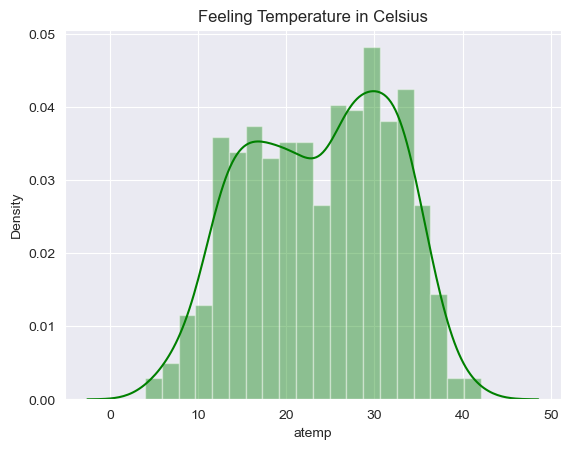

In [19]:
sns.distplot(bikes['atemp'],bins=20,color='g').set(title='Feeling Temperature in Celsius')

C:\Users\siz71\AppData\Local\Temp\ipykernel_19216\1028871063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikes['hum'],bins=20,color='g').set(title='Humidity')


[Text(0.5, 1.0, 'Humidity')]

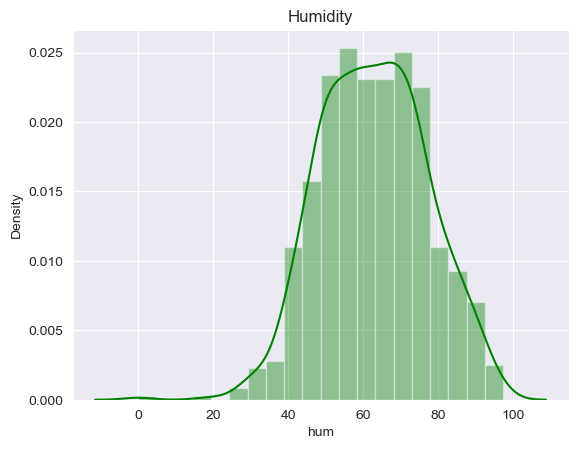

In [20]:
sns.distplot(bikes['hum'],bins=20,color='g').set(title='Humidity')

C:\Users\siz71\AppData\Local\Temp\ipykernel_19216\3821036263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikes['windspeed'],bins=20,color='g').set(title='Windspeed')


[Text(0.5, 1.0, 'Windspeed')]

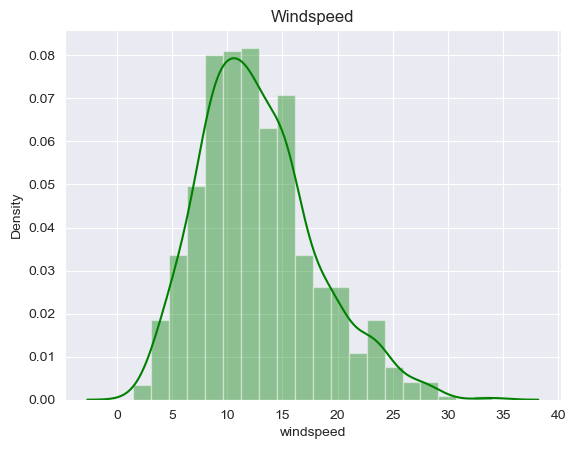

In [21]:
sns.distplot(bikes['windspeed'],bins=20,color='g').set(title='Windspeed')

C:\Users\siz71\AppData\Local\Temp\ipykernel_19216\455997020.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikes['cnt'],bins=20,color='g').set(title='Total Rentals')


[Text(0.5, 1.0, 'Total Rentals')]

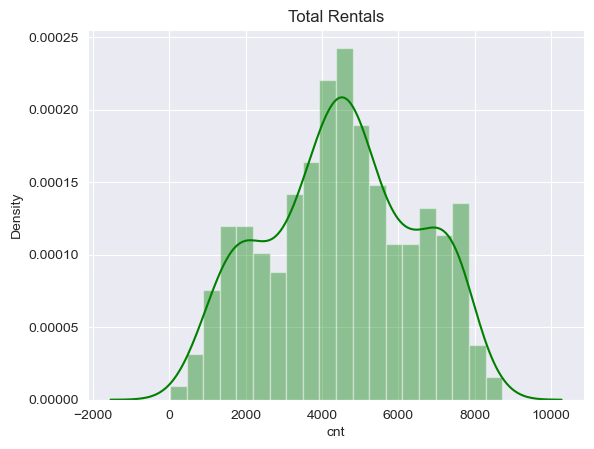

In [22]:
#Target variable cnt
sns.distplot(bikes['cnt'],bins=20,color='g').set(title='Total Rentals')

#### Lets plot counts with box plots for categorical variables

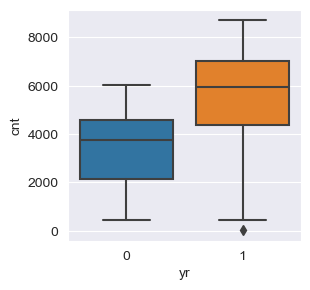

In [23]:
# yr (0:2018,1:2019)
plt.figure(figsize=(3,3))
sns.boxplot(x='yr',y='cnt',data=bikes)
plt.show()

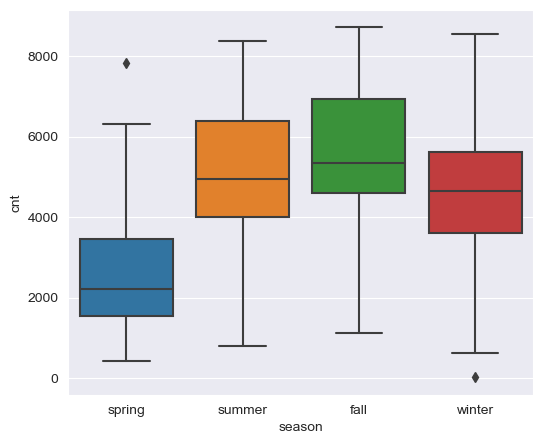

In [24]:
# season (1:spring, 2:summer, 3:fall, 4:winter)
plt.figure(figsize=(6,5))
sns.boxplot(x='season',y='cnt',data=bikes)
plt.show()

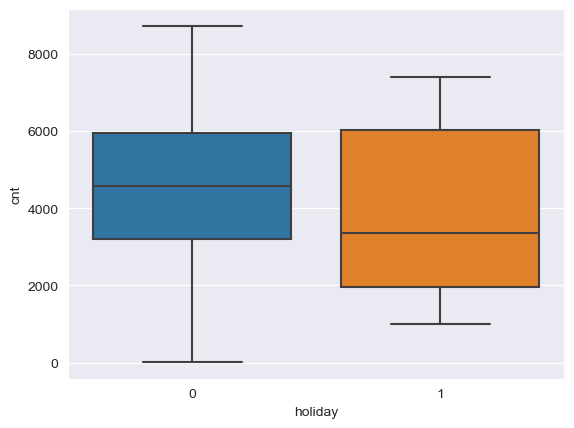

In [25]:
# holiday (0:no, 1:yes)
sns.boxplot(x='holiday',y='cnt',data=bikes)
plt.show()

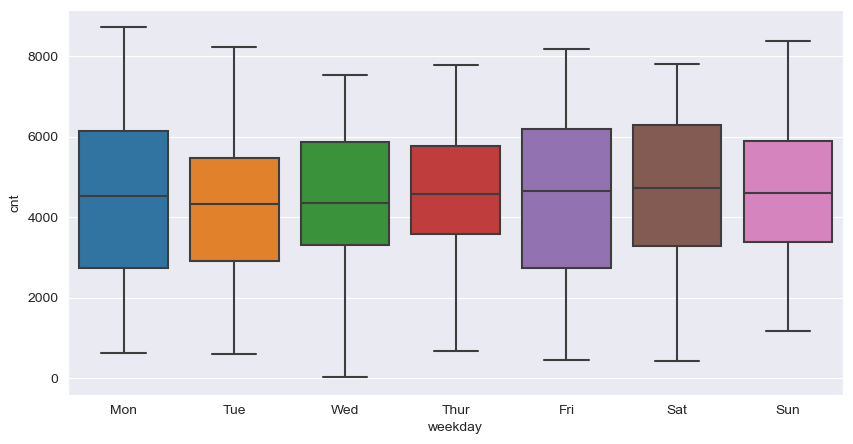

In [26]:
# weekday (day of the week)
plt.figure(figsize=(10,5))
sns.boxplot(x='weekday',y='cnt',data=bikes)
plt.show()

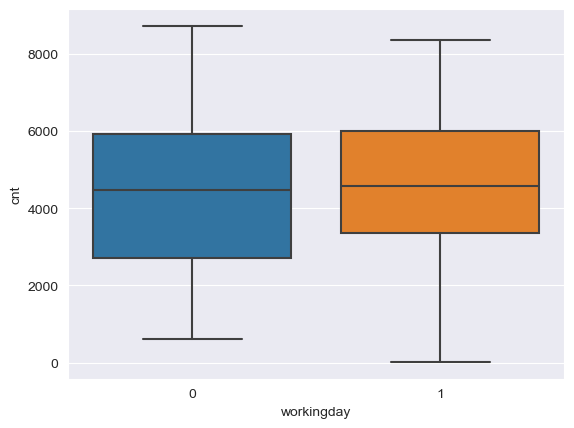

In [27]:
# workingday (1:yes, 0:No)
sns.boxplot(x='workingday',y='cnt',data=bikes)
plt.show()

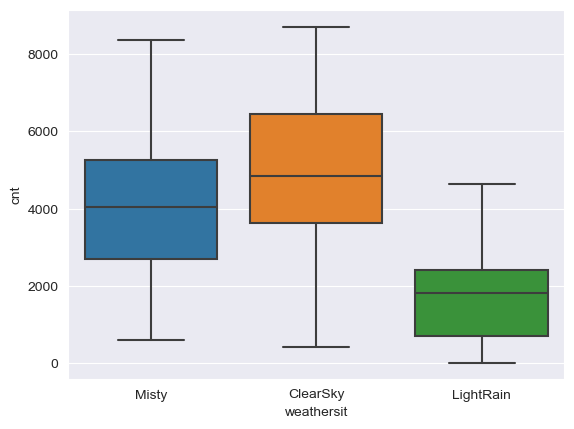

In [28]:
# ClearSky: Clear, Few clouds, Partly cloudy, Partly cloudy
# Misty: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# LightRain: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# Rainy: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
sns.boxplot(x='weathersit',y='cnt',data=bikes)
plt.show()

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In our current dataset we have some categorical variables which are represented by 0,1. We will not consider them while visualizing numeric variables.<br>
we will convert numeric variables casual,registered and cnt with data type integer into float

In [29]:
# checking data before datatype change
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,ClearSky,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thur,1,ClearSky,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,ClearSky,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [30]:
# Changing the datatype 
int_var_list = ['casual','registered','cnt']
bikes[int_var_list] = bikes[int_var_list].apply(lambda x: x.astype(float))

In [31]:
# checking data after datatype change
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Tue,0,Misty,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,ClearSky,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Thur,1,ClearSky,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,ClearSky,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [32]:
num_var_list=['temp','atemp','hum','windspeed','casual','registered','cnt']

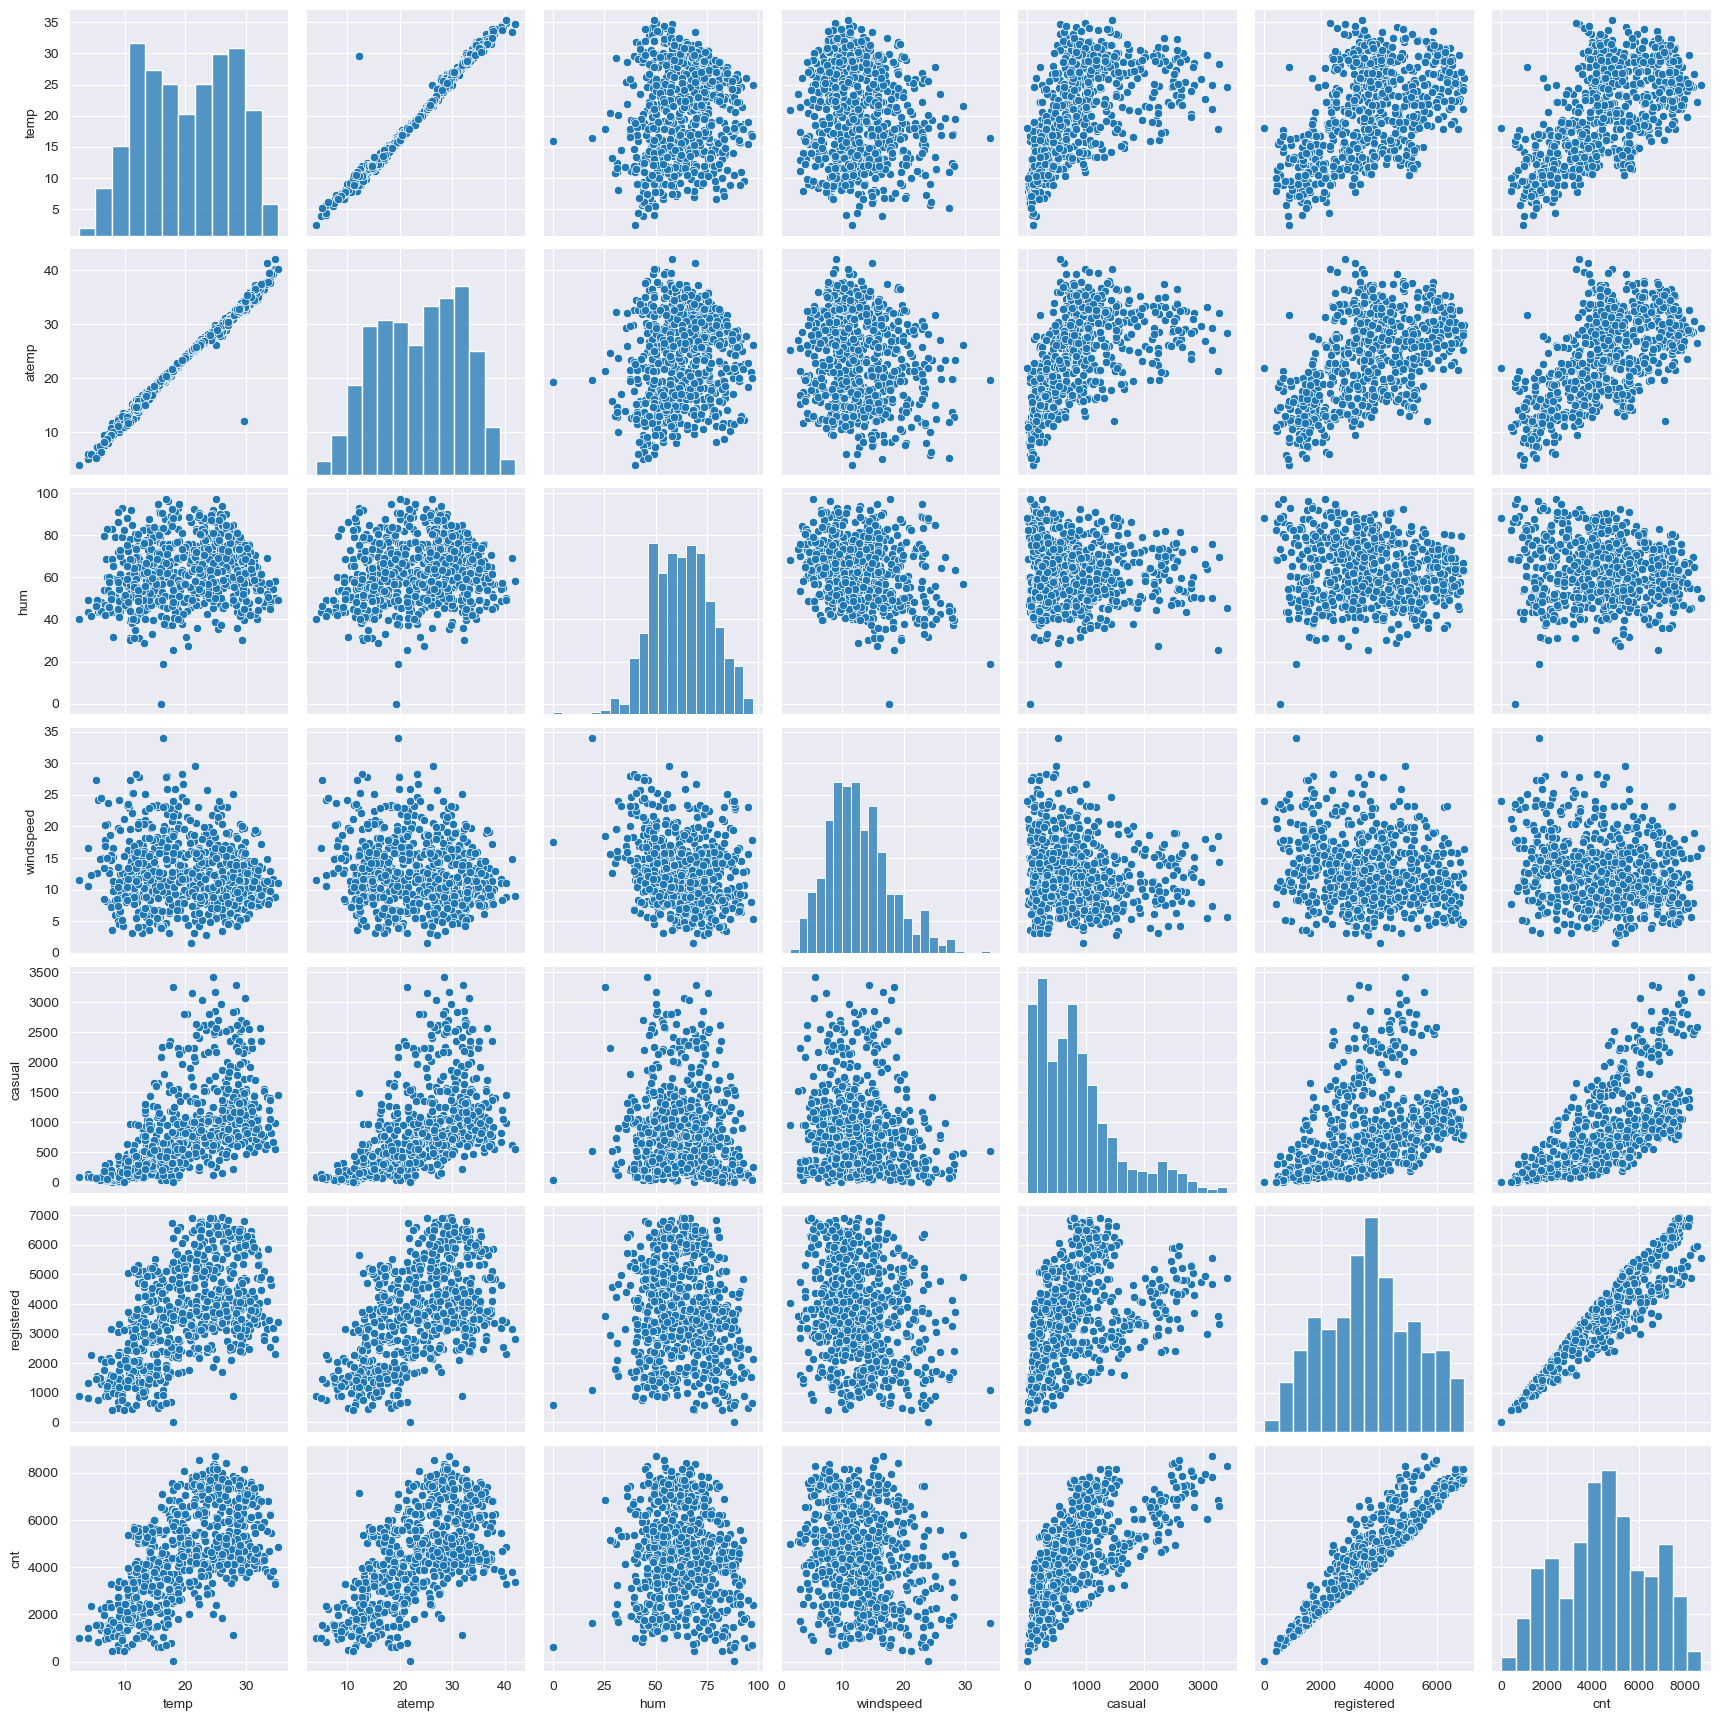

In [33]:
sns.pairplot(bikes[num_var_list])
plt.show()

From the above pair plot we can observe graphically the corretion between numeric variables with each other.<br>
As expected 'temp' and 'atemp' are highly correlated. 'Cnt' also seems to have a correlation with 'temp' and 'atemp'.
 'cnt' is highly correlated with 'casual' and 'registered'

To understand this correlations numerically lets look at correlation values in a heat map

In [34]:
bikes[num_var_list].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

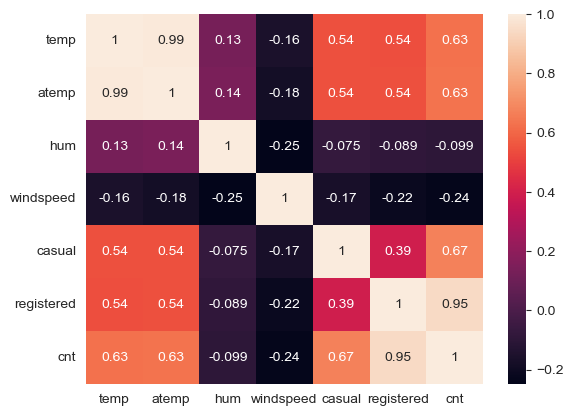

In [35]:
sns.heatmap(bikes[num_var_list].corr(), annot=True)

As observed earlier and visible in the above heat map.
1. temp and atemp have a very high correlation. we can drop one of the two features to avoid multi collinearity.
2. Our Target variable 'cnt' has a positive correlation with temp and atemp
3. 'cnt' is highly correlated with 'casual' and 'registered'. This is expected because 'cnt' is the result of their sum.
4. cnt is negatively correlated with windspeed, suggesting that the demand dips on windy days.

## Step 4. Data Preparation 


Let's now prepare the data and build the model.
We will drop
1. Highly correlated column 'temp'.
2. Unique identifier columns like 'dteday', 'instant'.

In [36]:
print(len(bikes.dteday.unique()))
print(len(bikes.instant.unique()))

730
730


In [37]:
#'dteday','instant' are unique identifiers and cannot provide any insight in model building. so we will drop them. 
bikes = bikes.drop(['dteday','instant'],axis=1)

In [38]:
# 'atemp' and 'temp' are Highly correlated so we can drop one of them. we choose to drop column 'temp'.
bikes = bikes.drop(['temp'],axis=1)

In [39]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,0,Misty,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,spring,0,Jan,0,Tue,0,Misty,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,spring,0,Jan,0,Wed,1,ClearSky,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,spring,0,Jan,0,Thur,1,ClearSky,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,spring,0,Jan,0,Fri,1,ClearSky,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [40]:
#list of categorical variables to be converted dummy columns
categorical_var = ['season','mnth','weekday','weathersit']

#adding dummies
bikes_dummies=pd.get_dummies(bikes[categorical_var],drop_first=True)
bikes_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:

print(bikes.shape)
print(bikes_dummies.shape)

(730, 13)
(730, 22)


In [42]:
#Appendig these dummy categorical dataset to bikes dataframe
bikes = pd.concat([bikes, bikes_dummies], axis=1)

In [43]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
0,spring,0,Jan,0,Mon,0,Misty,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,0,Misty,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,ClearSky,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thur,1,ClearSky,10.60610,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,ClearSky,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Dropping the categorical variables which were converted to dummies
bikes = bikes.drop(categorical_var,axis=1)

In [45]:
bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
0,0,0,0,18.18125,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


## Step 5. Model Building and Evaluation

In this stage we will 
1. Split the data into train-test sets.
2. Scale the data for better modelling.


In [46]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

In [47]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


In [48]:
bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
0,0,0,0,18.18125,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
bikes.describe()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,0.246575,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836,0.028767,0.336986
std,0.500343,0.167266,0.465405,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,0.431313,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164,0.167266,0.473004
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling the Features 

Here we can see that some features like 'atemp', 'hum','windspeed' have integer values > 0 while some features like 'holiday', 'workingday' etc have values raning between 0 and 1. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. <br>

There are two common ways of rescaling:
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [50]:
#initialise the MinMaxScaler
scaler = MinMaxScaler()

In [51]:
# Apply scaler() to all the numeric columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']

#Since this is a training sample, here we are fitting and then transform. For Testing samples we only do transform.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [52]:
# lets look at the features after scaling
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
653,1,0,1,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,1,0,0,0,0,0,0,1


In [53]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


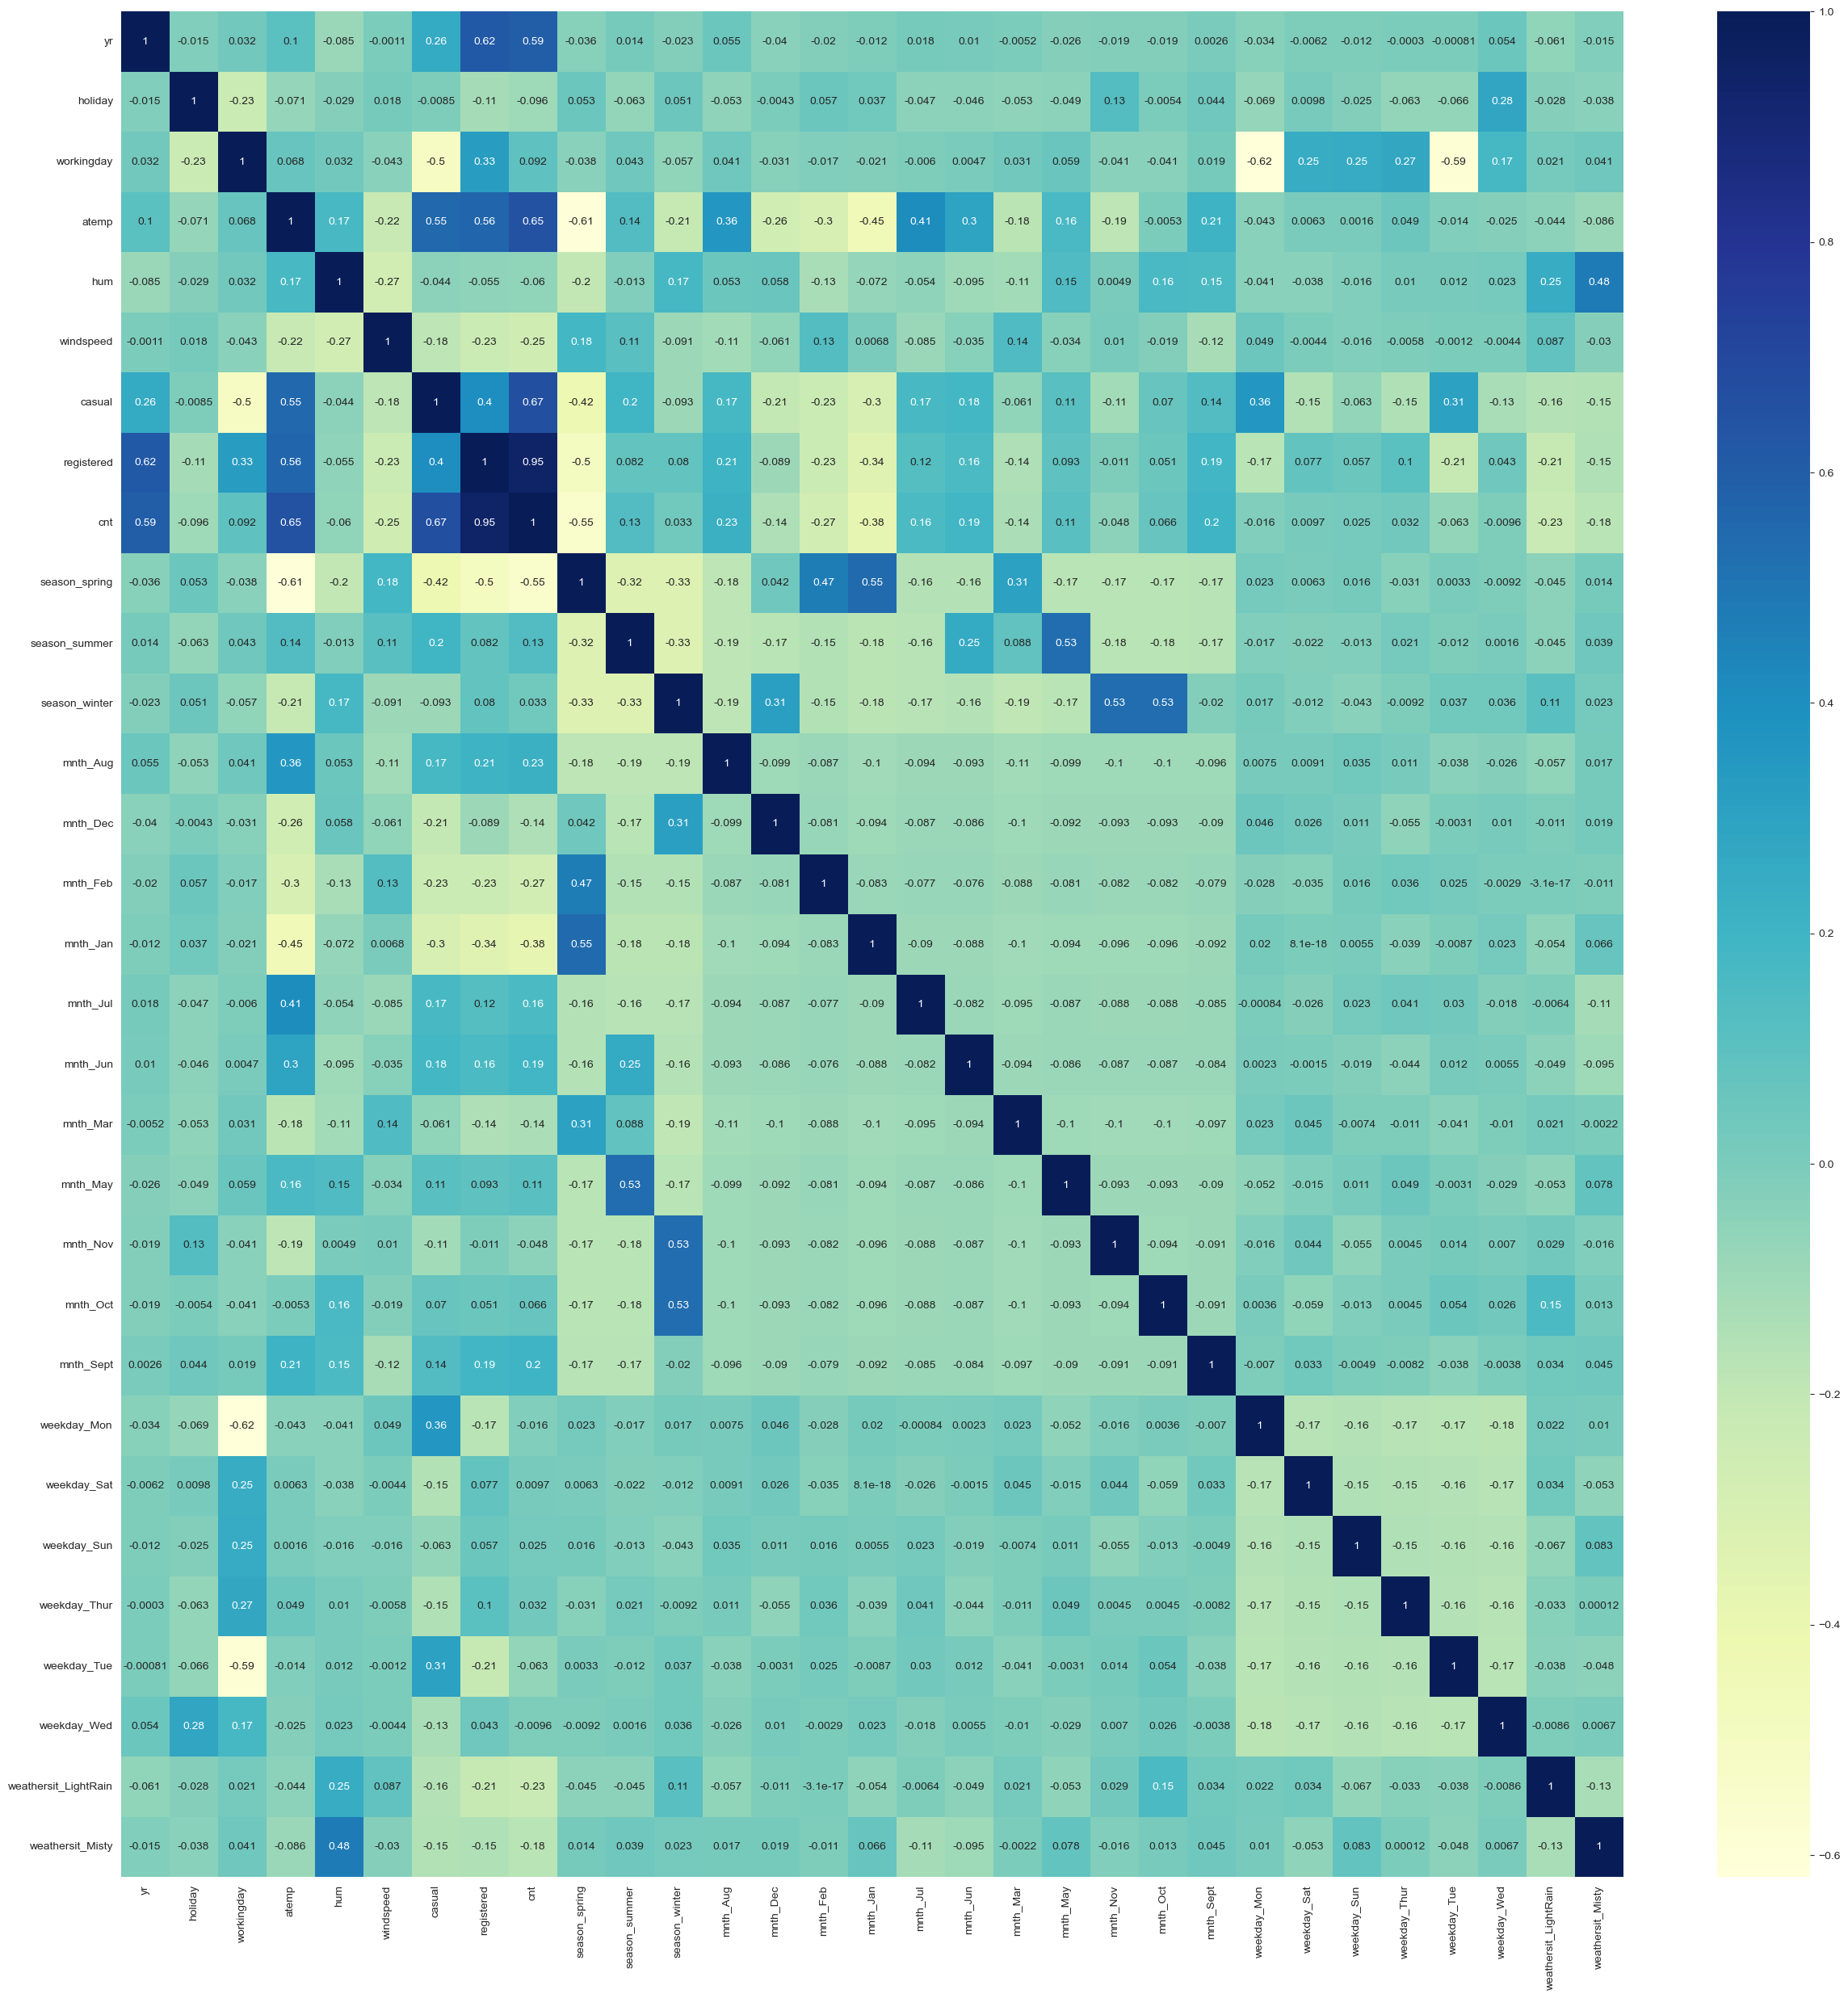

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

As we can see in the above heat map, cnt is highly correlated with 'registered','casual','atemp' and 'yr' in order.
'cnt' with  'registered','casual' is expected as their sum gives 'cnt' hence we can drop these two features as they are redundant.

In [55]:
df_train = df_train.drop(['registered','casual'], axis=1)

In [56]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1


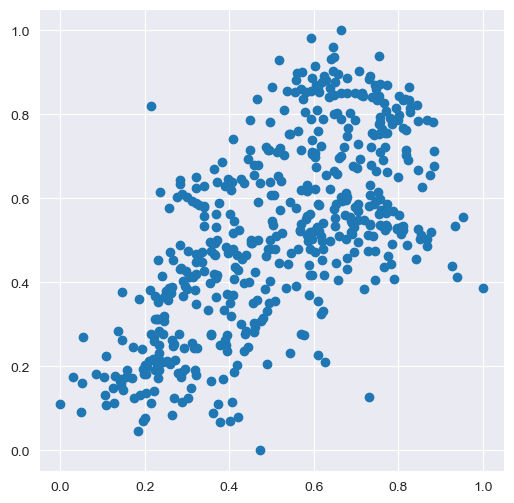

In [57]:
#Since atemp has a high correlation with cnt, lets plot a scatter plot with them
plt.figure(figsize=(6,6))
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

In [58]:
# Now we have 510 rows and 29 columns in our training dataset. Lets go ahead and build first model with this dataset.
df_train.shape

(510, 29)

We pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [59]:
y_train = df_train.pop('cnt')
X_train = df_train

In [60]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


### Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [61]:
import statsmodels.api as sm

In [62]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

In [63]:
X_train_lm.head()

,const,atemp
653,1.0,0.501133
576,1.0,0.766351
426,1.0,0.438975
728,1.0,0.200348
482,1.0,0.391735


In [64]:
#fit a model
lr = sm.OLS(y_train, X_train_lm).fit()

In [65]:
lr.params

const    0.162924
atemp    0.683633
dtype: float64

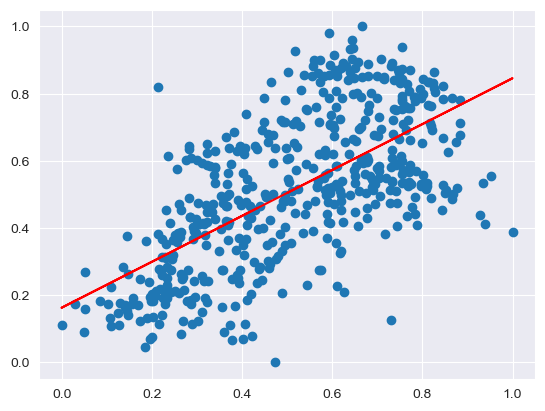

In [66]:
# lets plot a line using the model parameters
plt.scatter(X_train_lm.iloc[:,1],y_train)
plt.plot(X_train_lm.iloc[:,1], 0.163+(0.683*X_train_lm.iloc[:,1]),'r')
plt.show()

In [67]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.10e-61
Time:                        15:07:46   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.000       0.124       0.202
atemp          0.6836      0.036     19.098      0.000       0.613       0.754
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.842
Skew:                           0.090   Prob(JB):                        0.241
Kurtosis:                       2.682   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our first model built using a single feature has R-squared as 0.418 and Adj. R-squared as 0.417, so they explain 41% of variance, which is fine. As we keep adding more features we can expect the R-squared and Adj. R-squared to increase. P-value for the first feature's coefficient is 0 which is good indicator.

We can infer that as atemp is positively correlated to cnt. So on warmer days people are more likely to rent a bike for commute.

In [68]:
# lets add another feature 'yr'
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp','yr']])
X_train_lm.head()

,const,atemp,yr
653,1.0,0.501133,1
576,1.0,0.766351,1
426,1.0,0.438975,1
728,1.0,0.200348,1
482,1.0,0.391735,1


In [69]:
#fit a model
lr = sm.OLS(y_train, X_train_lm).fit()

#Analyse the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.07e-131
Time:                        15:07:46   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.000       0.043       0.102
atemp          0.6252      0.026     24.001      0.000       0.574       0.676
yr             0.2378      0.011     21.511      0.000       0.216       0.260
==============================================================================
Omnibus:                       38.030   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.520
Skew:                          -0.536   Prob(JB):                     1.96e-13
Kurtosis:                       4.266   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our second model built using a two features 'atemp' and 'yr' has R-squared as 0.696 and Adj. R-squared as 0.694, so they explain 69% of variance, which is decent growth in model performance. As we keep adding more features we can expect the R-squared and Adj. R-squared to increase. P-value for the two features is 0 which is good indicator.

As year increases the bike rentals count is growing indicating that popularity for the bike rentals is growing with period.

### Adding all the variables to the model
Lets add all the features to the model and analyse. But since we have so 28 independent features doing a manual elimination will be difficult. we will use Recursive Feature Elimination.<br>
This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [70]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

We will elimate features in a stages. 
1. First we will build model with 15 features and analyze.
2. Then we will build model with 10 features and analyze.

In [71]:
print(X_train.shape)
print(y_train.shape)
y_train.head()

(510, 28)
(510,)


653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [72]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator =lm, n_features_to_select =15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [73]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', False, 11),
 ('weekday_Thur', False, 10),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 9),
 ('weathersit_LightRain', True, 1),
 ('weathersit_Misty', True, 1)]

In [74]:
# Lets look at the columns which RFE chose to retain
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sept', 'weekday_Mon', 'weathersit_LightRain', 'weathersit_Misty'],
      dtype='object')

In [75]:
#List of columns which RFE recommends to drop
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [76]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [77]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_rfe)

In [78]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [79]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          9.67e-187
Time:                        15:07:47   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3662 

In [80]:
# Calculate the VIFs for the new model features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,season_winter,2.93
5,season_spring,2.89
14,weathersit_Misty,2.26
0,yr,2.06
10,mnth_Nov,1.82
8,mnth_Jan,1.75
7,mnth_Dec,1.54


From the model summay and VIF, we observe that feature 'hum' has a very high VIF of 25.08. We will drop this feature and rebuild the model and analyze. 

In [81]:
# dropping the feature season_summer
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

Rebuilding the model without `hum`

In [82]:
X_train_new.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weekday_Mon,weathersit_LightRain,weathersit_Misty
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,0,1,0,1


In [83]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [84]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [85]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          1.10e-184
Time:                        15:07:47   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2902 

In [86]:
# Calculate the VIFs for the new model features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.61
3,windspeed,3.98
5,season_winter,2.55
4,season_spring,2.36
0,yr,2.06
9,mnth_Nov,1.80
7,mnth_Jan,1.65
13,weathersit_Misty,1.53
6,mnth_Dec,1.46
8,mnth_Jul,1.35


After dropping the 'hum' feature the VIF value for other features like 'atemp' has come down a little. The Adj. R-squared value has reducd from 0.843 to 0.832.<br>
Feature 'weekday_Mon' has a P value of 0.07. Let us analyze by dropping this feature.

In [87]:
# dropping the feature season_summer
X_train_new = X_train_new.drop(["weekday_Mon"], axis = 1)

In [88]:
X_train_new.head()

,yr,holiday,atemp,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_LightRain,weathersit_Misty
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,0,0,1


In [89]:
#Rebuilding the model without `mnth_Aug`
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [90]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          3.95e-185
Time:                        15:07:47   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2931 

In [91]:
# Calculate the VIFs for the new model features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,season_winter,2.55
4,season_spring,2.35
0,yr,2.06
9,mnth_Nov,1.80
7,mnth_Jan,1.65
12,weathersit_Misty,1.53
6,mnth_Dec,1.46
8,mnth_Jul,1.35


After dropping the 'weekday_Mon' feature, R-squared has changed from 0.837 to 0.836 which is not significant. And Adj. R-squared value has remained same at 0.832. VIF value for all features remain < 5 and P value of coefficients is <0.05. Prob (F-statistic) is nearly zero.<br>
Overall the model explains 83% of variance of cnt with 13 features which looks good.<br>
We will also build a model with 10 features and see the performance.

### RFE2
Recursive feature elimination
We will analyze with 10 features how the model behaves and analyze.

In [92]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator =lm, n_features_to_select =10)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', False, 2),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 17),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 18),
 ('weekday_Sun', False, 16),
 ('weekday_Thur', False, 15),
 ('weekday_Tue', False, 13),
 ('weekday_Wed', False, 14),
 ('weathersit_LightRain', True, 1),
 ('weathersit_Misty', True, 1)]

In [95]:
# Lets look at the columns which RFE chose to retain
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'mnth_Jul', 'mnth_Sept', 'weathersit_LightRain', 'weathersit_Misty'],
      dtype='object')

In [96]:
#List of columns which RFE recommends to drop
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [97]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train[col]

In [98]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_rfe2)

In [99]:
lm2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [100]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          2.03e-185
Time:                        15:07:48   Log-Likelihood:                 491.76
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3813 

In [101]:
# Calculate the VIFs for the new model features
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
#Drop the constant for VIF analysis
X_train_new = X_train_new.drop(["const"], axis = 1)

In [103]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.73
2,atemp,12.25
4,windspeed,3.90
9,weathersit_Misty,2.12
0,yr,2.03
5,season_spring,1.84
6,mnth_Jul,1.39
8,weathersit_LightRain,1.21
7,mnth_Sept,1.20
1,holiday,1.04


For the second REF model with 10 features, we observe that R-squared is 0.831 and Adj. R-squared is 0.828. 
P-value of all the coefficients is < 0.05. However the VIF for feature 'hum' is high (15.73). We will drop this feature and analyze.

In [104]:
# dropping the feature season_summer
X_train_new = X_train_new.drop(["hum"], axis = 1)

# Add constant
X_train_new = sm.add_constant(X_train_new)

In [105]:
X_train_new.head()

,const,yr,holiday,atemp,windspeed,season_spring,mnth_Jul,mnth_Sept,weathersit_LightRain,weathersit_Misty
653,1.0,1,0,0.501133,0.300794,0,0,0,0,0
576,1.0,1,0,0.766351,0.264686,0,1,0,0,0
426,1.0,1,0,0.438975,0.255342,1,0,0,0,1
728,1.0,1,0,0.200348,0.663106,1,0,0,0,0
482,1.0,1,0,0.391735,0.188475,0,0,0,0,1


In [106]:
lm2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [107]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          4.83e-184
Time:                        15:07:48   Log-Likelihood:                 485.62
No. Observations:                 510   AIC:                            -951.2
Df Residuals:                     500   BIC:                            -908.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3008 

In [108]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [109]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.50
3,windspeed,3.75
0,yr,2.03
4,season_spring,1.51
8,weathersit_Misty,1.49
5,mnth_Jul,1.32
6,mnth_Sept,1.20
7,weathersit_LightRain,1.06
1,holiday,1.03


After dropping the 'hum' feature, in this model with 9 features, R-squared has changed from 0.831 to 0.827.
And Adj. R-squared value has reduced from 0.828 to 0.824.
VIF value for all features remain < 5 and P value of coefficients is <0.05. Prob (F-statistic) is nearly zero.
Overall the model explains 82.7% of variance of target variable with 9 features which looks good.<br>

In our analysis we have built two models.<br>
One with 13 features which R-squared as 0.836 and Adj. R-squared as 0.832.<br>
Another with 9 features which R-squared as 0.827 and Adj. R-squared as 0.824.<br>
We will be going ahead with the second model with 9 features since it explains almost equal variance with fewer features which will make model less complex.

In [112]:
# Columns of our 2nd model. 
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_spring', 'mnth_Jul',
       'mnth_Sept', 'weathersit_LightRain', 'weathersit_Misty'],
      dtype='object')

In [114]:
# Adding constant back
X_train_new = sm.add_constant(X_train_new)

## Step 6. Residual Analysis of the train data


We will do Residual Analysis on test set. This is to ensure that we satisfy the underlying assumption of liner regression model.<br>
The assumption are:
- Linear relationship between X and Y - Already plotted above
- Error terms are normally distributed (not X, Y)
- Error terms have constant variance (homoscedasticity)
- Error terms are independent of each other

In [116]:
# Predicting y value using the model
y_train_predict = lm2.predict(X_train_new)

#### Check 1

C:\Users\siz71\AppData\Local\Temp\ipykernel_19216\3673333884.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_predict), bins = 20)


Text(0.5, 0, 'Errors')

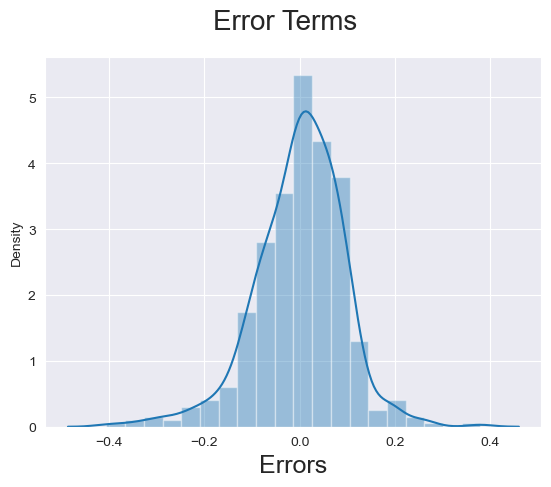

In [118]:
# Plot the histogram for error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)    # Plot heading 
plt.xlabel('Errors',fontsize=18)   # X-label

The error terms are normally distributed around 0 which satisfies the assumptions of Linear Regression.

#### Check 2

In [160]:
# Check the Mean of Error terms
residuals = y_train - y_train_predict
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.073793942687688e-16


We can see that the mean of error terms is almost 0

**Check 3: Homoscedasticity**

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we should confirm that there is no pattern in the error terms.

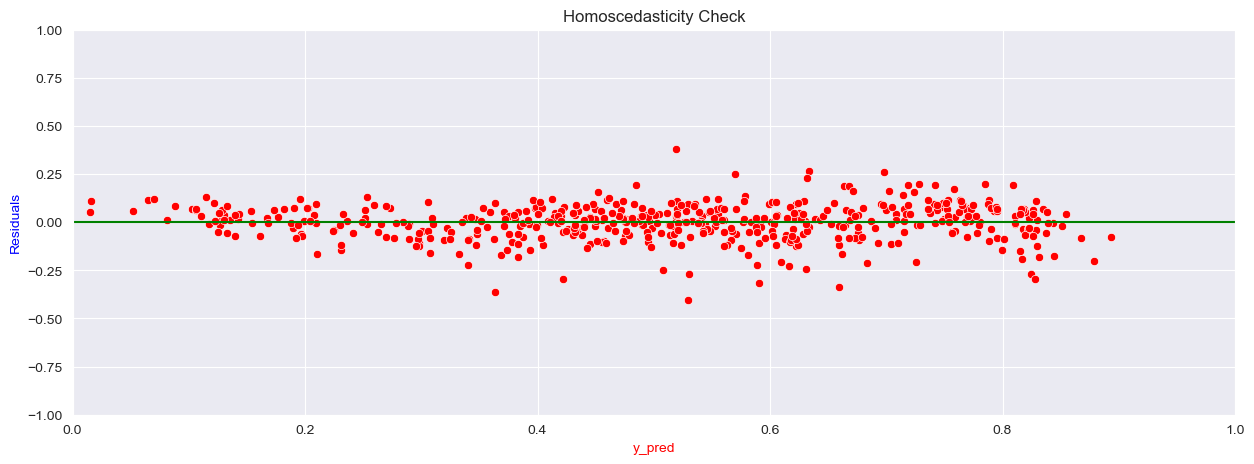

In [168]:
plt.figure(figsize=(15,5))
p = sns.scatterplot(x=y_train_predict,y=residuals, color = "r")
plt.xlabel('y_pred', color = 'r')
plt.ylabel('Residuals', color = 'b')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot(x=[0,1],y=[0,0],color='g')
p = plt.title('Homoscedasticity Check')
plt.show()

**Check 4. Error terms are independent of each other**

That means there should not be any auto-correlation between error terms.

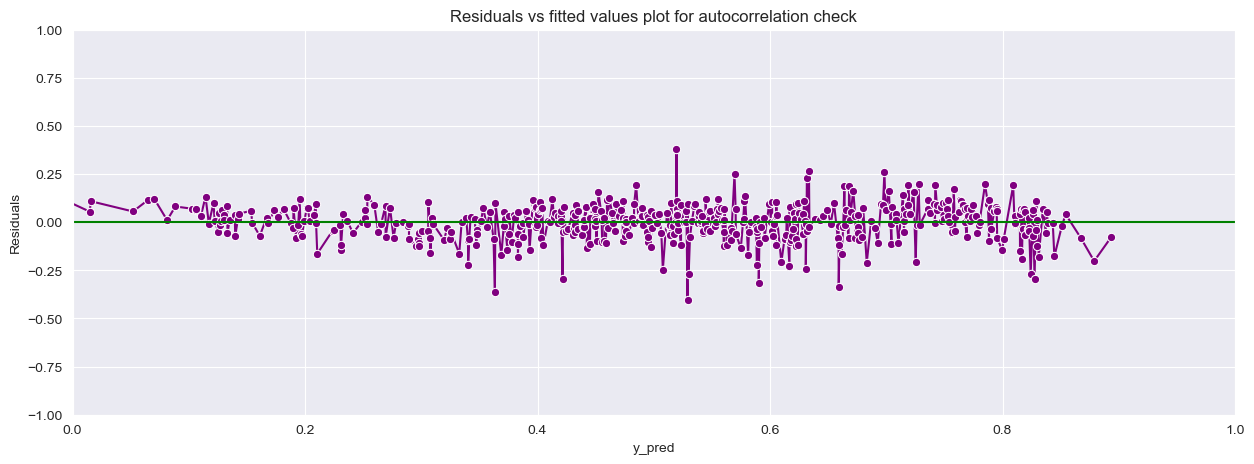

In [182]:
plt.figure(figsize=(15,5))
p = sns.lineplot(x=y_train_predict,y=residuals,marker='o',color='purple')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot(x=[0,1],y=[0,0],color='green')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

## Step 7. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model lm2.

#### Applying the scaling on the test sets

In [120]:
# Apply scaler() to all the numeric columns except the 'yes-no' and 'dummy' variables in Testing dataset.
num_vars = ['atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [122]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.255708,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.437258,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [123]:
y_test = df_test.pop('cnt')
X_test = df_test

In [147]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [148]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_spring',
       'mnth_Jul', 'mnth_Sept', 'weathersit_LightRain', 'weathersit_Misty'],
      dtype='object')

In [149]:
X_test_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed', 'weathersit_LightRain',
       'weathersit_Misty'],
      dtype='object')

In [150]:
#dropped_columns = X_train.columns[~rfe.support_]
dropped_columns = ['workingday', 'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed','hum','casual','registered']

In [152]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm to match model parameters
X_test_lm = X_test_lm.drop(dropped_columns, axis = 1)

In [154]:
# Both train and test sets have same input features
print(X_test_lm.shape)
print(X_train_new.shape)

(219, 10)
(510, 10)


In [156]:
# Making predictions using the finalized model
y_pred_lm = lm2.predict(X_test_lm)

## Step 8. Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred_lm')

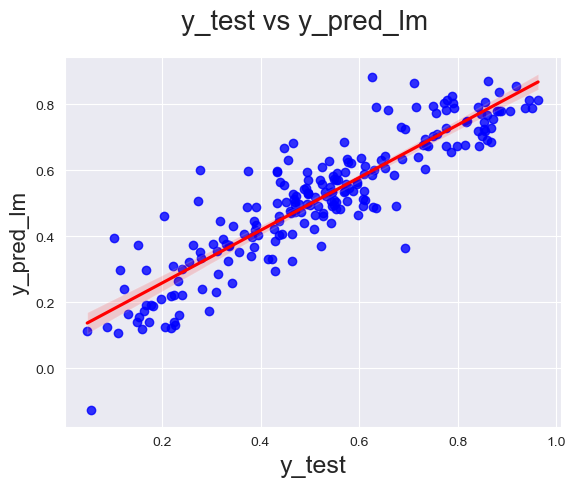

In [174]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
#plt.scatter(y_test, y_pred_lm)
sns.regplot(x=y_test,y=y_pred_lm, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
fig.suptitle('y_test vs y_pred_lm', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_lm', fontsize = 16)    


We can see that the equation of our best fitted line is:

$ Count = 0.300 + 0.236  \times  year - 0.090  \times  holiday + 0.412 \times atemp - 0.137 \times windspeed - 0.145 \times seasonspring - 0.070 \times mnthJul + 0.058 \times mnthSept - 0.275 \times weathersitLightRain - 0.082 \times weathersitMisty $


From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [175]:
# r2_score for 9 variables on test dataset and it's predcition
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_lm)
print("r2 score is: ",r2_score)
n = len(X_test)
p = 9
print("and Adjusted r2 score is: ",1-(1-r2_score)*(n-1)/(n-p-1))

r2 score is:  0.8050787334363542
and Adjusted r2 score is:  0.7986121511332949


Thus, for the model with 9 variables, the r-squared on training and test data is about 82.7% and 80.5% respectively. The **Adjusted r-squared** on the train and test set is 82.4% and 79.86% respectively.

In [180]:
print(type(lm2.params))
print(abs(lm2.params).sort_values(ascending = False)) # It's magnitude of the coefficinets that matters

<class 'pandas.core.series.Series'>
atemp                   0.412509
const                   0.300777
weathersit_LightRain    0.275431
yr                      0.235925
season_spring           0.145320
windspeed               0.137043
holiday                 0.090179
weathersit_Misty        0.082352
mnth_Jul                0.069797
mnth_Sept               0.058511
dtype: float64


This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 

Thus, the final model consists of the **9 variables** mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.

#### Suggestion to BoomBikes CLient

We can conclude from our model that below three features are the most influential features for BIke Rentals:
- Feeling Temperature : with coefficient `0.412`
- 𝑤𝑒𝑎𝑡ℎ𝑒𝑟𝑠𝑖𝑡𝐿𝑖𝑔ℎ𝑡𝑅𝑎𝑖𝑛 [Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ]:  with coefficient `0.275`
- Year: with coefficient `0.236`

### Conclusion: 
In this case study, we built our first model considering one single variable. Then we finally added all the variables and then analyzed the model performance based on VIF and p-values. We finally arrived at a model using 9 features whose performance was good. We also plotted the error term to check if they are normally distributed. Our regression line also looks pretty clustered around the central line.